# This script contains:
1. Import of libraries and dataset
2. Subsetting, wrangling and cleaning time-series data
3. Time series analysis: decomposition
4. Testing for stationarity

## 1. Import of libraries and dataset

In [3]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disabling deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how our plots will appear.

In [4]:
# Importing Dataset
df=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_year_on_year',index_col=False)

In [5]:
df.shape

(45403, 10)

In [6]:
df.head()

,date,state,n_killed,n_injured,age_group,gender,status,year,month,day
0,2013-01-01,Ohio,1,3,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",2013,1,1
1,2013-01-07,North Carolina,2,2,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,2013,1,7
2,2013-01-19,New Mexico,5,0,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,2013,1,19
3,2013-01-23,Tennessee,1,3,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,23
4,2013-01-25,Missouri,1,3,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,2013,1,25


## 2. Subsetting, wrangling and cleaning time-series data

In [8]:
# Extracting relevent columms for analysis
columns=['date','n_killed']
# Creating a required subset
df_sub=df[columns]

In [9]:
df_sub.head()

,date,n_killed
0,2013-01-01,1
1,2013-01-07,2
2,2013-01-19,5
3,2013-01-23,1
4,2013-01-25,1


In [10]:
df_sub.shape

(45403, 2)

In [11]:
df_sub.columns

Index(['date', 'n_killed'], dtype='object')

In [12]:
df_sub.isnull().sum() 

date        0
n_killed    0
dtype: int64

In [13]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()


40959

In [14]:
#drop duplicates
df_no_dups = df_sub.drop_duplicates()

In [15]:
dups_2=df_no_dups.duplicated()
dups_2.sum()

0

In [16]:
df_no_dups.dtypes

date        object
n_killed     int64
dtype: object

In [17]:
# Set the "Date" column as the index

from datetime import datetime
df_no_dups['datetime'] = pd.to_datetime(df_no_dups['date'])# Create a datetime column from "Date.""
df_no_dups['datetime'].index = pd.to_datetime(df_no_dups['date'].index)
# df_no_dups = df_no_dups.set_index('datetime') # Set the datetime as the index of the dataframe.
df_no_dups.drop(['date'], axis=1, inplace=True) # Dropping the "date" column.
df_no_dups.head()

,n_killed,datetime
0,1,2013-01-01
1,2,2013-01-07
2,5,2013-01-19
3,1,2013-01-23
4,1,2013-01-25


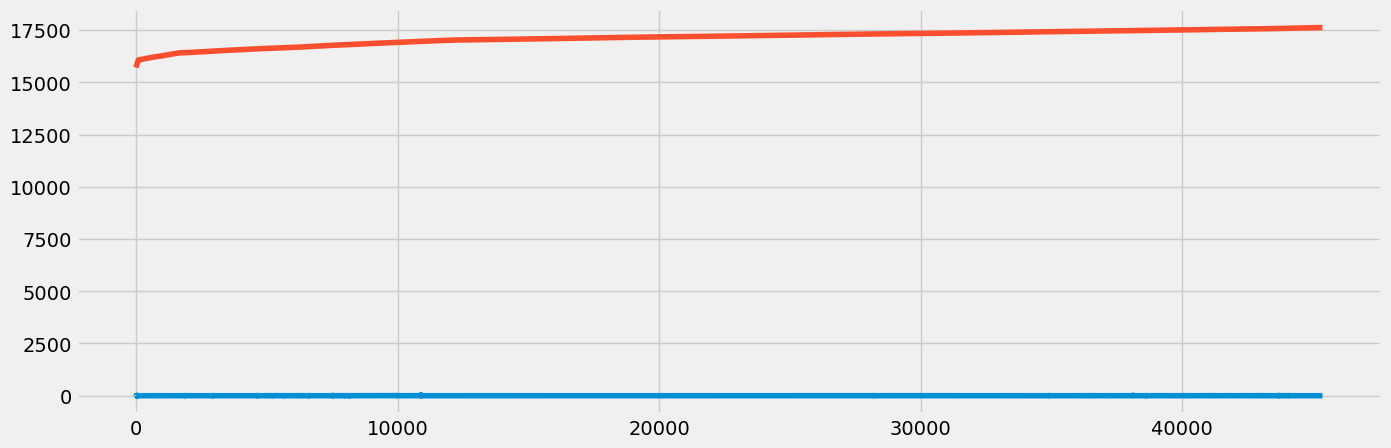

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_no_dups)

The data set require smoothing. 

In [20]:
# Compute moving average with a window size of 82
df_no_dups['moving_avg'] = df_no_dups['n_killed'].rolling(window=82).mean()

In [21]:
df_no_dups['moving_avg'].value_counts()

moving_avg
1.170732    172
1.182927    160
1.134146    154
1.146341    152
1.195122    140
           ... 
1.719512      2
1.500000      2
1.597561      2
1.536585      1
1.560976      1
Name: count, Length: 91, dtype: int64

In [22]:
df_no_dups.columns

Index(['n_killed', 'datetime', 'moving_avg'], dtype='object')

In [23]:
data_sub = df_no_dups.set_index('datetime') # Set the datetime as the index of the dataframe.

In [24]:
data_sub.head(82)

,n_killed,moving_avg
datetime,,
2013-01-01,1,NaN
2013-01-07,2,NaN
2013-01-19,5,NaN
2013-01-23,1,NaN
2013-01-25,1,NaN
...,...,...
2013-12-07,1,NaN
2013-12-22,1,NaN
2013-12-25,1,NaN


In [25]:
data_sub = data_sub.drop(['n_killed'], axis=1)

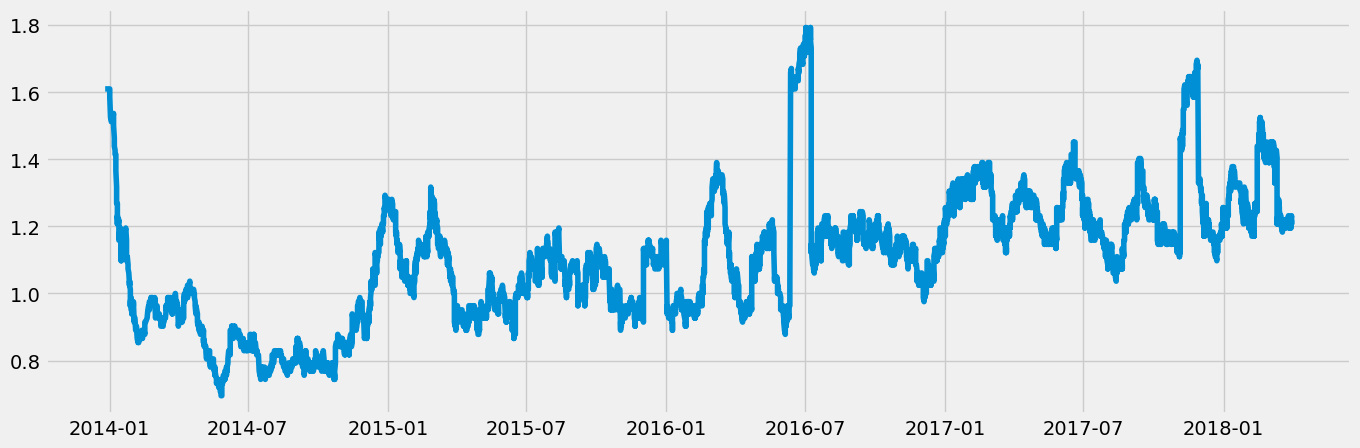

In [26]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [27]:
#Checking for missing values
data_sub.isnull().sum() 

moving_avg    81
dtype: int64

In [28]:
#dropping missing values
data_sub=data_sub.dropna()

In [29]:
data_sub.isnull().sum()

moving_avg    0
dtype: int64

In [30]:
data_sub.head() 

,moving_avg
datetime,
2013-12-26,1.609756
2014-01-01,1.609756
2014-01-01,1.585366
2014-01-02,1.524390
2014-01-03,1.524390


In [31]:
data_sub.index = pd.date_range(start='2013-01-01', periods=len(data_sub), freq='D')

## 3. Time series analysis: decomposition

In [33]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [34]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

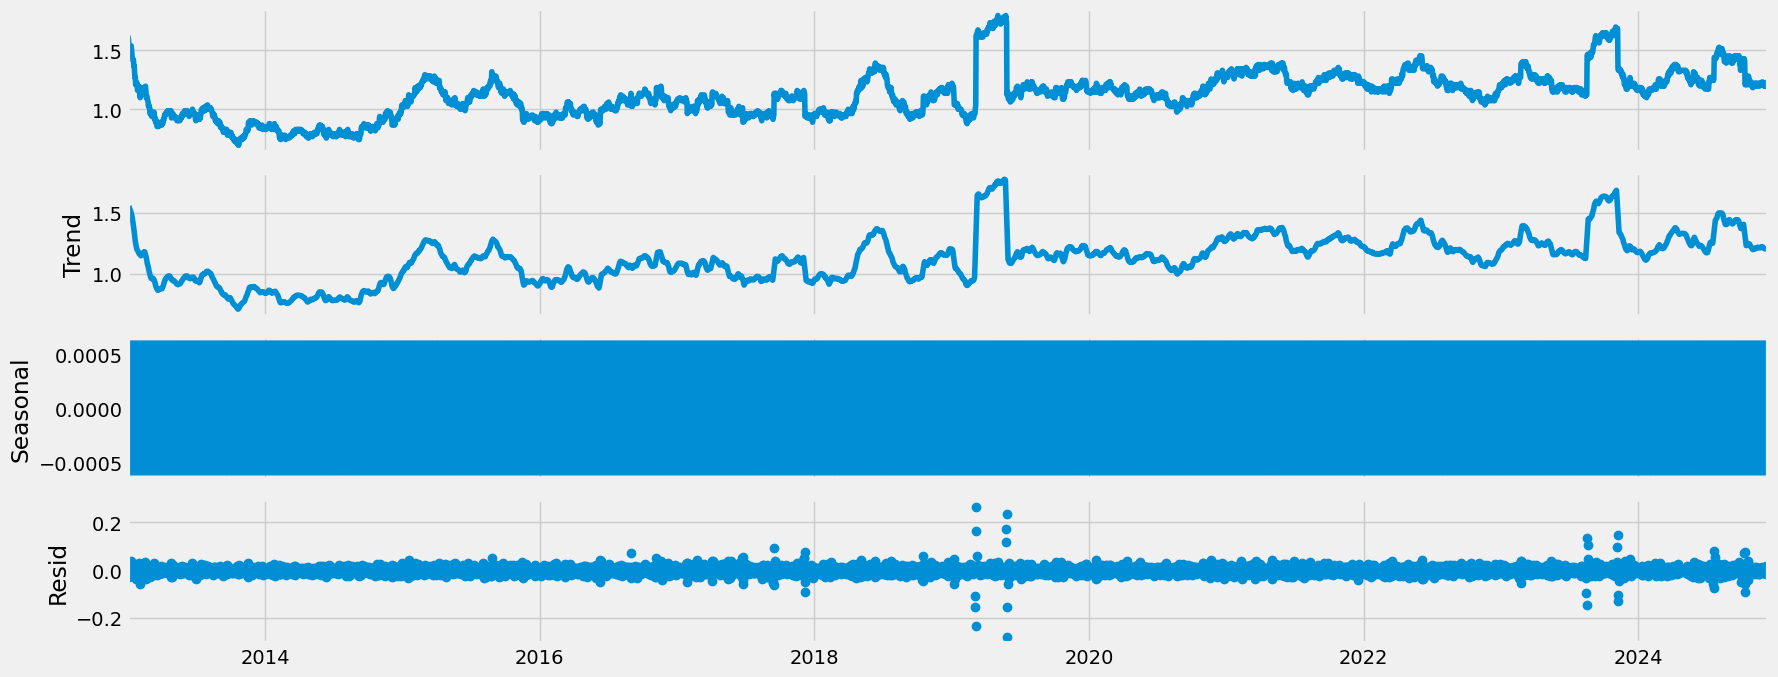

In [35]:
# Plot the separate components

decomposition.plot()
plt.show()

There is no clear trend in the data, no seasonality either but has a lot of noise. 

## 4. Testing for stationarity

In [37]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [38]:
# Apply the test using the function on the time series
dickey_fuller(data_sub['moving_avg'])

Dickey-Fuller Stationarity test:
Test Statistic                   -4.249136
p-value                           0.000543
Number of Lags Used               4.000000
Number of Observations Used    4358.000000
Critical Value (1%)              -3.431851
Critical Value (5%)              -2.862203
Critical Value (10%)             -2.567123
dtype: float64


Test statistic is smaller than critical values at both five and ten percent significance levels. p-value is also smaller than 0.05. This means that we can reject null hypothesis and thus the data is stationary. Thus, we can proceed with forecast. 

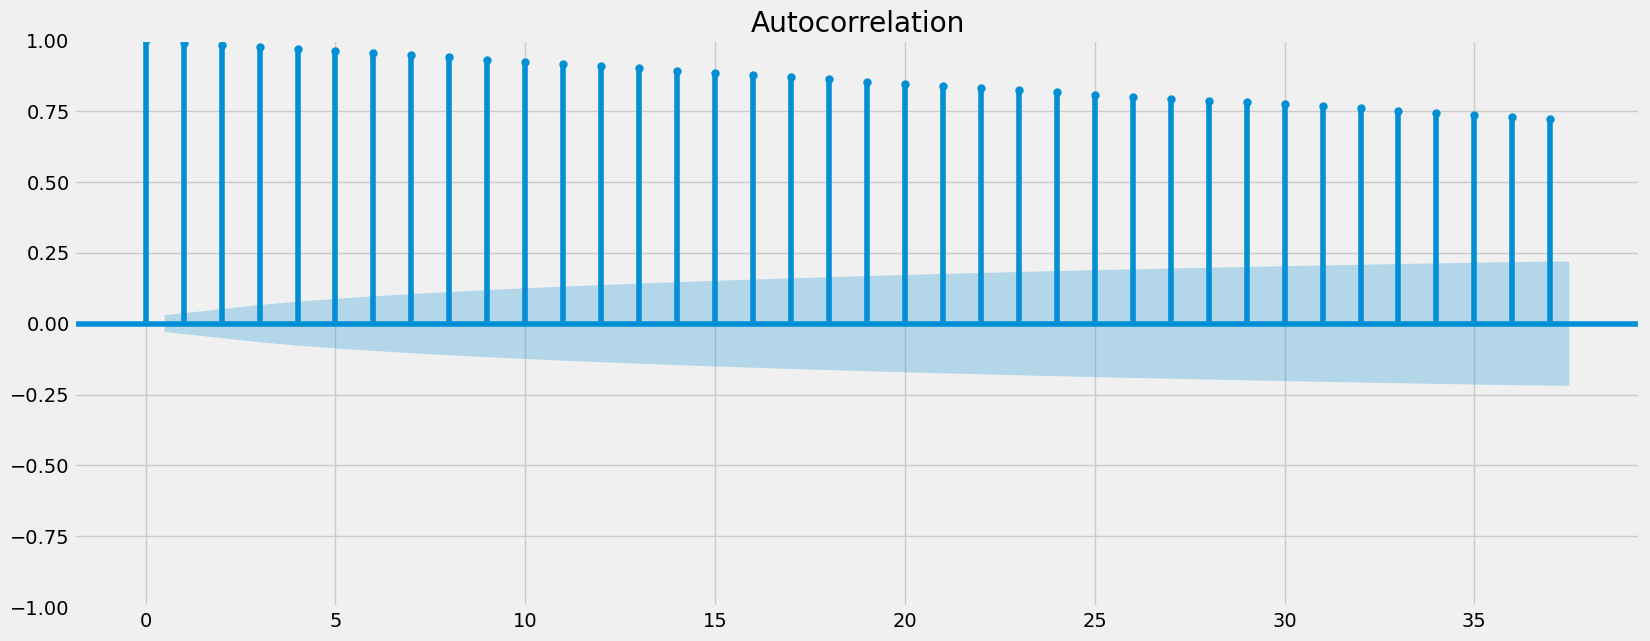

In [40]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

All the lags in the series go beyond the confidence level implying that the lags are significantly correlated to each other but the stationary is quite weak. 